<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.062830,64.574824,-2.463424,143.174230,146.113464,-2.939234
1,0.0,1.0,32.609054,46.404946,2.264430,91.278430,89.042305,2.236125
2,0.0,2.0,67.405572,51.089673,0.519246,129.014491,128.873338,0.141153
3,0.0,3.0,49.736452,60.648299,2.794793,123.179545,120.641229,2.538315
4,0.0,4.0,78.956926,28.464009,1.164218,118.585153,117.801709,0.783444
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.938532,27.106201,0.534456,62.579190,62.187493,0.391697
119996,999.0,116.0,77.043506,45.315890,-2.709349,129.650047,132.548898,-2.898850
119997,999.0,117.0,64.776028,86.021578,1.926340,162.723946,160.927051,1.796895
119998,999.0,118.0,97.496217,84.387681,0.646074,192.529971,192.056943,0.473029


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.062830,64.574824,-2.463424,143.174230,146.113464,-2.939234
1,0.0,1.0,32.609054,46.404946,2.264430,91.278430,89.042305,2.236125
2,0.0,2.0,67.405572,51.089673,0.519246,129.014491,128.873338,0.141153
3,0.0,3.0,49.736452,60.648299,2.794793,123.179545,120.641229,2.538315
4,0.0,4.0,78.956926,28.464009,1.164218,118.585153,117.801709,0.783444
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.938532,27.106201,0.534456,62.579190,62.187493,0.391697
119996,999.0,116.0,77.043506,45.315890,-2.709349,129.650047,132.548898,-2.898850
119997,999.0,117.0,64.776028,86.021578,1.926340,162.723946,160.927051,1.796895
119998,999.0,118.0,97.496217,84.387681,0.646074,192.529971,192.056943,0.473029


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.062830  64.574824 -2.463424  143.174230  146.113464 -2.939234
      1.0    32.609054  46.404946  2.264430   91.278430   89.042305  2.236125
      2.0    67.405572  51.089673  0.519246  129.014491  128.873338  0.141153
      3.0    49.736452  60.648299  2.794793  123.179545  120.641229  2.538315
      4.0    78.956926  28.464009  1.164218  118.585153  117.801709  0.783444
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.938532  27.106201  0.534456   62.579190   62.187493  0.391697
      116.0  77.043506  45.315890 -2.709349  129.650047  132.548898 -2.898850
      117.0  64.776028  86.021578  1.926340  162.723946  160.927051  1.796895
      118.0  97.496217  84.387681  0.646074  192.529971  192.056943  0.473029
      119.0  96.480059  28.324304  2.159831  136.964194  135.037230  1.926964

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.062830  64.574824 -2.463424  143.174230  146.113464 -2.939234
      1.0    32.609054  46.404946  2.264430   91.278430   89.042305  2.236125
      2.0    67.405572  51.089673  0.519246  129.014491  128.873338  0.141153
      3.0    49.736452  60.648299  2.794793  123.179545  120.641229  2.538315
      4.0    78.956926  28.464009  1.164218  118.585153  117.801709  0.783444
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.938532  27.106201  0.534456   62.579190   62.187493  0.391697
      116.0  77.043506  45.315890 -2.709349  129.650047  132.548898 -2.898850
      117.0  64.776028  86.021578  1.926340  162.723946  160.927051  1.796895
      118.0  97.496217  84.387681  0.646074  192.529971  192.056943  0.473029
      119.0  96.480059  28.324304  2.159831  136.964194  135.037230  1.926964

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.062830,64.574824,-2.463424,143.174230,146.113464,-2.939234
1,0.0,1.0,32.609054,46.404946,2.264430,91.278430,89.042305,2.236125
2,0.0,2.0,67.405572,51.089673,0.519246,129.014491,128.873338,0.141153
3,0.0,3.0,49.736452,60.648299,2.794793,123.179545,120.641229,2.538315
4,0.0,4.0,78.956926,28.464009,1.164218,118.585153,117.801709,0.783444
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.938532,27.106201,0.534456,62.579190,62.187493,0.391697
119996,999.0,116.0,77.043506,45.315890,-2.709349,129.650047,132.548898,-2.898850
119997,999.0,117.0,64.776028,86.021578,1.926340,162.723946,160.927051,1.796895
119998,999.0,118.0,97.496217,84.387681,0.646074,192.529971,192.056943,0.473029


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.062830  64.574824 -2.463424  143.174230  146.113464 -2.939234
      1.0    32.609054  46.404946  2.264430   91.278430   89.042305  2.236125
      2.0    67.405572  51.089673  0.519246  129.014491  128.873338  0.141153
      3.0    49.736452  60.648299  2.794793  123.179545  120.641229  2.538315
      4.0    78.956926  28.464009  1.164218  118.585153  117.801709  0.783444
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.938532  27.106201  0.534456   62.579190   62.187493  0.391697
      116.0  77.043506  45.315890 -2.709349  129.650047  132.548898 -2.898850
      117.0  64.776028  86.021578  1.926340  162.723946  160.927051  1.796895
      118.0  97.496217  84.387681  0.646074  192.529971  192.056943  0.473029
      119.0  96.480059  28.324304  2.159831  136.964194  135.037230  1.926964

[120000 rows x 6 columns]

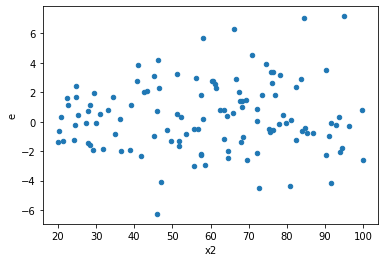

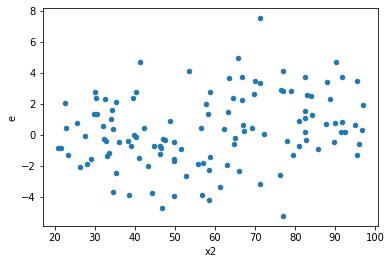

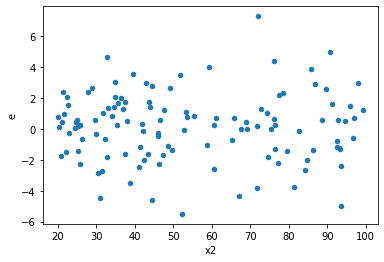

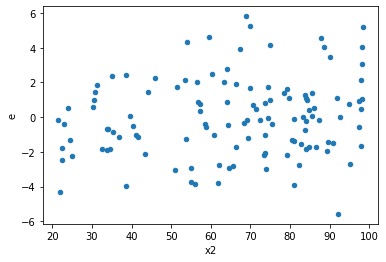

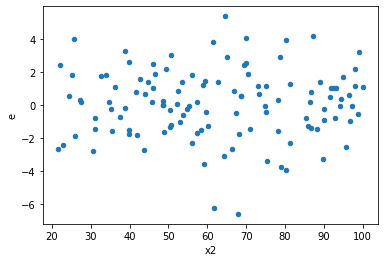

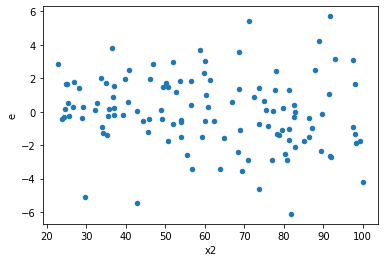

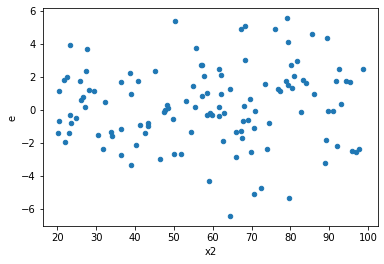

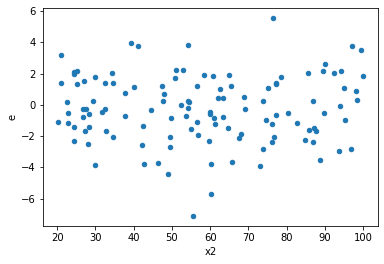

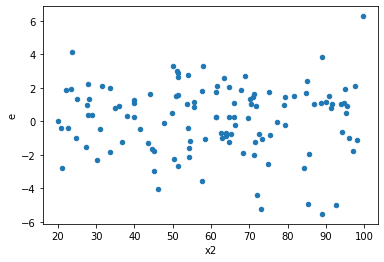

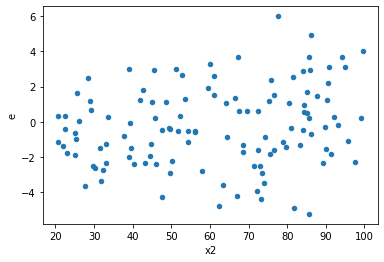

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,193.06041708203875,303.8889564925064,4.196965588739973,6.606281662880574,1.574061431574409,0.1275973222792861,0.936201338860357,0.06379866113964305,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,152.49948043026433,255.40535391573155,3.315206096310094,5.552290302515903,1.6747949120556151,0.08365319568233098,0.9581734021588345,0.04182659784116549,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,161.12487097086046,272.05036876097495,3.5027145863230533,5.914138451325543,1.6884442924405845,0.07895194212790946,0.9605240289360453,0.03947597106395473,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,207.76037572598028,230.80997454506843,4.516529907086528,5.017608142284097,1.1109431899058981,0.7227638550220239,0.638618072488988,0.36138192751101195,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,131.97923874339733,170.12717542750167,2.869113885726029,3.6984168571196014,1.2890449819783705,0.39243147053912075,0.8037842647304396,0.19621573526956038,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,135.49704539681952,261.11243874065667,2.94558794340912,5.676357363927319,1.9270710883470354,0.028286625337979654,0.9858566873310102,0.014143312668989827,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,168.01993407926017,344.83672019153107,3.6526072625926123,7.496450438946328,2.0523560021685343,0.016406271683145457,0.9917968641584273,0.008203135841572728,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,179.46153453702968,196.57726544445532,3.901337707326732,4.273418814009898,1.0953726989551291,0.7586987235768652,0.6206506382115674,0.3793493617884326,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,165.50517643828115,265.65560027540545,3.597938618223503,5.775121745117509,1.605119585939184,0.11213174700545703,0.9439341264972715,0.056065873502728514,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,193.06041708203875,303.8889564925064,4.196965588739973,6.606281662880574,1.574061431574409,0.1275973222792861,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,152.49948043026433,255.40535391573155,3.315206096310094,5.552290302515903,1.6747949120556151,0.08365319568233098,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,161.12487097086046,272.05036876097495,3.5027145863230533,5.914138451325543,1.6884442924405845,0.07895194212790946,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,207.76037572598028,230.80997454506843,4.516529907086528,5.017608142284097,1.1109431899058981,0.7227638550220239,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,131.97923874339733,170.12717542750167,2.869113885726029,3.6984168571196014,1.2890449819783705,0.39243147053912075,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,135.49704539681952,261.11243874065667,2.94558794340912,5.676357363927319,1.9270710883470354,0.028286625337979654,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,168.01993407926017,344.83672019153107,3.6526072625926123,7.496450438946328,2.0523560021685343,0.016406271683145457,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,179.46153453702968,196.57726544445532,3.901337707326732,4.273418814009898,1.0953726989551291,0.7586987235768652,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,165.50517643828115,265.65560027540545,3.597938618223503,5.775121745117509,1.605119585939184,0.11213174700545703,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      921
Reject001=0 : Heteroscedasticity     79
Name: Result_test, dtype: int64